In [1]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
# Ease of Movement 
def EMV(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EMV = dm / br 
    EMV_MA = pd.Series(EMV.rolling(ndays).mean(), name = 'EMV') 
    data = data.join(EMV_MA) 
    return data 

In [4]:
# Retrieve the AAPL data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2024-07-30")  
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,221.649994,226.449997,221.649994,226.339996,226.339996,60412400
2024-07-08,227.089996,227.850006,223.250000,227.820007,227.820007,59085900
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64516900


In [5]:
# Compute the 14-day Ease of Movement for AAPL
n = 14
AAPL_EMV = EMV(data, n)
EMV = AAPL_EMV['EMV']

In [7]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7));

<Figure size 1000x700 with 0 Axes>

In [8]:
# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

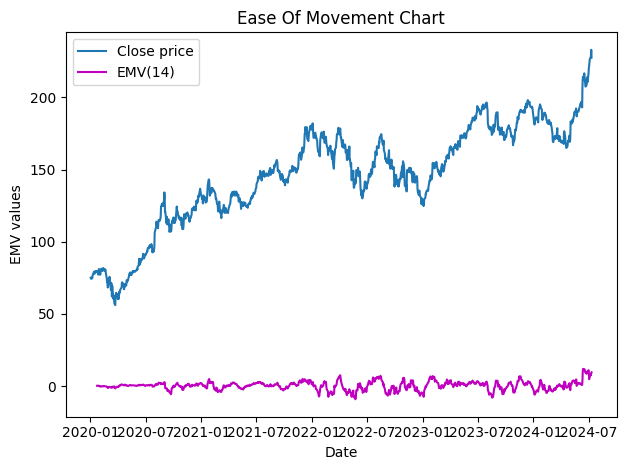

In [10]:
# Set the title and axis labels
plt.title('AAPL Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Plot the close price of the Apple
plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Ease Of Movement Chart')
plt.xlabel('Date')
plt.ylabel('EMV values')

# Plot the ease of movement
plt.plot(EMV, 'm', label='EMV(14)')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()